**Objetivo do desafio**
-
O Sr. João tem uma rede de quatro lojas que pertence ao e-commerce **Alura Store**, ele quer vender uma dessas lojas para **ter um capital e investir em um novo negócio**.

O objetivo é ajudar o Sr. João a decidir qual loja vender para investir em um novo negócio.

Como analista de dados, deverei analisar qual dessas lojas tem o menor desempenho comparada às outras e com base nisso, gerar um relatório indicando ao Sr. João qual loja ele deve vender. Para isso, utilizarei as seguintes métricas

- Faturamento total de cada loja
- Categorias mais populares
- Média de avaliação dos clientes
- Produtos mais e menos vendidos
- Custo médio do frete

**Importação dos dados**
-

In [1]:
#inportando a biblioteca que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importando os dados
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

#lendo os dados e atribuindo à variáveis
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#lendo as primeiras linhas
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


**1. Análise do Faturamento**
-
Nesta primeira análise, devo calcular o **faturamento total** de cada loja. Somando os valores da coluna **Preço** de cada loja para estimar o faturamento.

In [2]:
#calculando o faturamneto por venda
loja['Faturamento'] = loja['Preço']
loja2['Faturamento'] = loja2['Preço']
loja3['Faturamento'] = loja3['Preço']
loja4['Faturamento'] = loja4['Preço']

#calculando faturamento total por loja
soma_loja = loja['Faturamento'].sum()
soma_loja2 = loja2['Faturamento'].sum()
soma_loja3 = loja3['Faturamento'].sum()
soma_loja4 = loja4['Faturamento'].sum()

#organizando os resultados criando um dicionário
faturamento_lojas={
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'faturamento': [soma_loja, soma_loja2, soma_loja3, soma_loja4]  # Lista de faturamento
}

df_faturamento = pd.DataFrame(faturamento_lojas)

df_faturamento['faturamento'] = df_faturamento['faturamento'].apply(lambda x:f'R$ {x:,.2f}' )

df_faturamento


,Loja,faturamento
0,Loja 1,"R$ 1,534,509.12"
1,Loja 2,"R$ 1,488,459.06"
2,Loja 3,"R$ 1,464,025.03"
3,Loja 4,"R$ 1,384,497.58"


#### **Visualização gráfica**

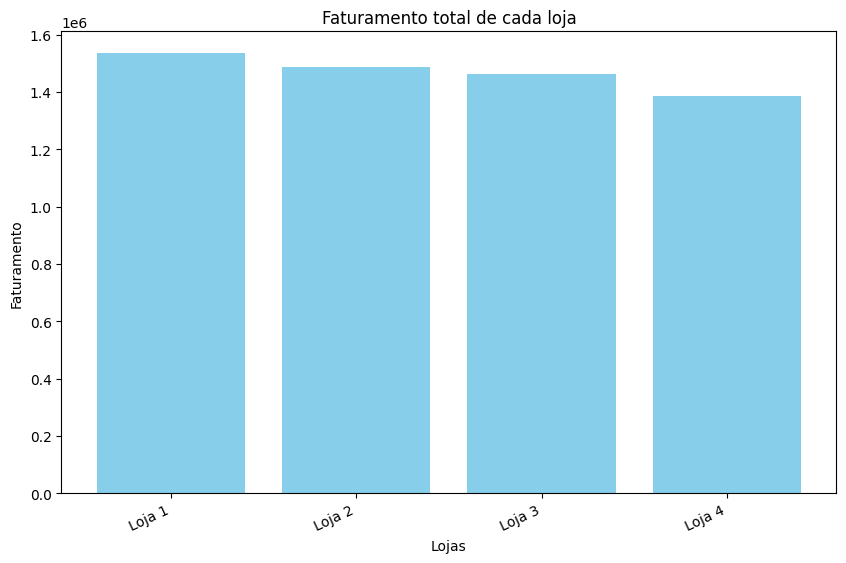

In [3]:
#visualização
plt.figure(figsize=(10, 6))
plt.bar(faturamento_lojas['Loja'], faturamento_lojas['faturamento'], color='skyblue')
plt.title('Faturamento total de cada loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.xticks(rotation=25, ha='right')

#exibir o gráfico
plt.show()


**2. Vendas por Categoria**
-
Neste passo, irei calcular a **quantidade de produtos vendidos** por **categoria** em cada loja. A ideia é agrupar os dados por categoria e contar o número de vendas 

In [4]:

urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

#criar um dicionário de DataFrames
lojas = {nome: pd.read_csv(url) for nome, url in urls.items()}

#adicionar coluna Loja e Receita em cada DataFrame
for nome, df in lojas.items():
    df["Loja"] = nome
    df["Receita"] = df["Preço"]

#juntar todas as lojas em um único DataFrame
todas_lojas = pd.concat(lojas.values(), ignore_index=True)

#calcular produtos vendidos por categoria
produtos_categoria = todas_lojas.groupby(["Loja", "Categoria do Produto"])["Produto"].count().reset_index()
produtos_categoria.rename(columns={"Produto": "Quantidade Vendida"}, inplace=True)

produtos_categoria.head()


,Loja,Categoria do Produto,Quantidade Vendida
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
2,Loja 1,eletronicos,448
3,Loja 1,esporte e lazer,284
4,Loja 1,instrumentos musicais,182


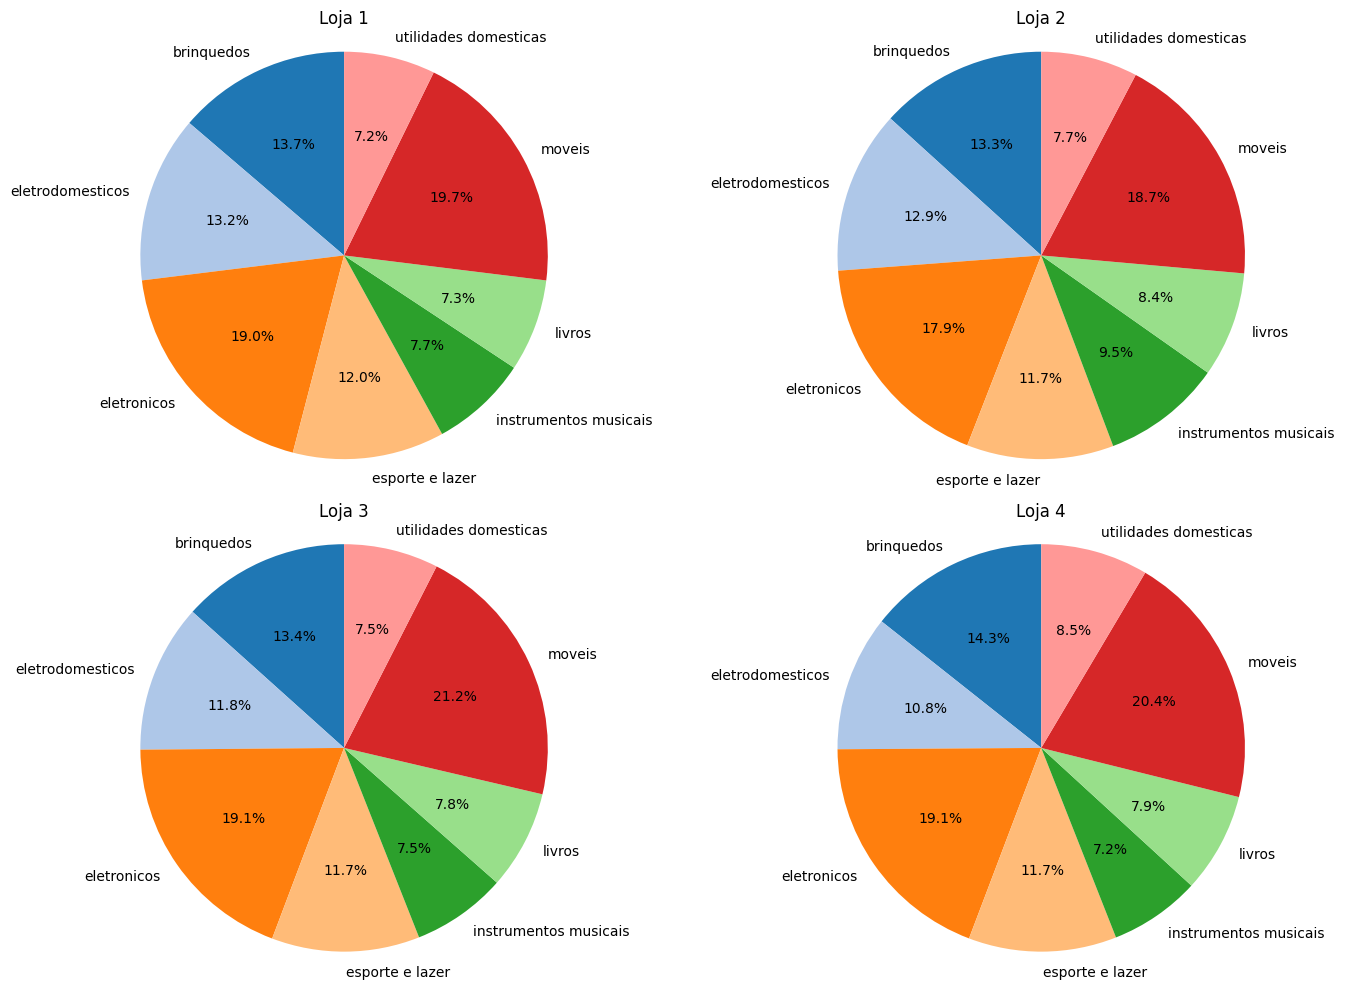

In [5]:
#descobre as lojas únicas
lojas_unicas = produtos_categoria["Loja"].unique()

#cria grid de 2 linhas x 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # transforma em lista para iterar

#paleta de cores (uma cor por categoria)
categorias = produtos_categoria["Categoria do Produto"].unique()
cores = plt.cm.tab20.colors  # até 20 cores diferentes

#cria gráfico de pizza para cada loja
for ax, loja in zip(axes, lojas_unicas):
    dados_loja = produtos_categoria[produtos_categoria["Loja"] == loja]
    
#define cores para cada categoria
    cor_pizza = [cores[list(categorias).index(cat) % len(cores)] for cat in dados_loja["Categoria do Produto"]]
    
#formato pizza
    ax.pie(
        dados_loja["Quantidade Vendida"],
        labels=dados_loja["Categoria do Produto"],
        autopct='%1.1f%%',
        startangle=90,
        colors=cor_pizza
    )
    ax.set_title(loja)
    ax.axis('equal')

plt.tight_layout()
plt.show()

**3. Média de Avaliação das Lojas**
-
Neste passo, iremos calcular a média das avaliações dos clientes para cada loja. O objetivo é **entender a satisfação dos clientes com os produtos vendidos**.

In [6]:
todas_lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja,Receita
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1,219.08
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1,256.35
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1,279.51
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1,1009.99
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1,446.99


In [7]:
#criando novo DataFrame recebendo a frequência
freq_avaliacoes = (todas_lojas.groupby(['Loja', 'Avaliação da compra'], observed=False)
                  .size()
                  .reset_index(name='freq_absoluta')
                  .sort_values(by=['Loja', 'Avaliação da compra'], ascending=False))
#visualizando o novo DataFrame
freq_avaliacoes.head()

,Loja,Avaliação da compra,freq_absoluta
19,Loja 4,5,1300
18,Loja 4,4,453
17,Loja 4,3,210
16,Loja 4,2,85
15,Loja 4,1,310


In [8]:
#criando a frequência relativa
freq_avaliacoes['freq_relativa'] = round((freq_avaliacoes['freq_absoluta'] / freq_avaliacoes['freq_absoluta'].sum()) * 100, 1)
freq_avaliacoes.head()

,Loja,Avaliação da compra,freq_absoluta,freq_relativa
19,Loja 4,5,1300,13.8
18,Loja 4,4,453,4.8
17,Loja 4,3,210,2.2
16,Loja 4,2,85,0.9
15,Loja 4,1,310,3.3


In [23]:
#renomeando as colunas
freq_avaliacoes.columns = ['Loja', 'Avaliação', 'Quantidade', 'Porcentagem (%)']
freq_avaliacoes

,Loja,Avaliação,Quantidade,Porcentagem (%)
19,Loja 4,5,1300,13.8
18,Loja 4,4,453,4.8
17,Loja 4,3,210,2.2
16,Loja 4,2,85,0.9
15,Loja 4,1,310,3.3
14,Loja 3,5,1356,14.4
13,Loja 3,4,434,4.6
12,Loja 3,3,193,2.0
11,Loja 3,2,79,0.8
10,Loja 3,1,297,3.1


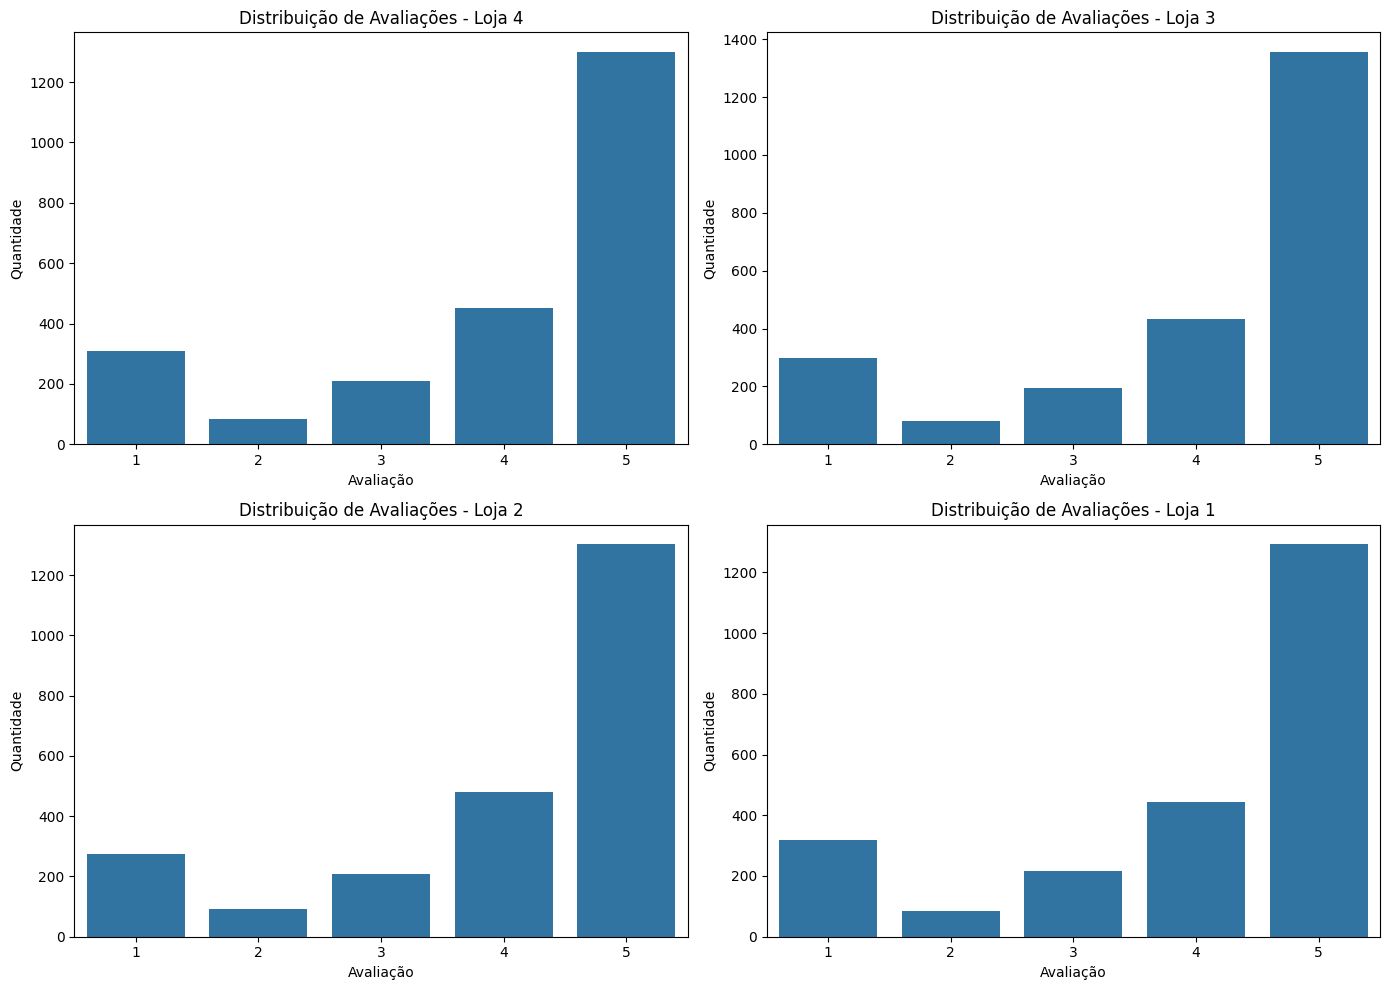

In [10]:
#plotando gráfico para visualizar os dados
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # transforma em lista para facilitar o loop

#pega os nomes das lojas únicas
lojas = freq_avaliacoes['Loja'].unique()

#loop para plotar cada loja em um subplot
for i, loja in enumerate(lojas):
    dados_loja = freq_avaliacoes[freq_avaliacoes['Loja'] == loja]
    sns.barplot(data=dados_loja, x='Avaliação', y='Quantidade', ax=axes[i])

    axes[i].set_title(f'Distribuição de Avaliações - {loja}')
    axes[i].set_xlabel('Avaliação')
    axes[i].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

**4. Produtos Mais e Menos Vendidos**
-
Neste passo, deve identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja.  Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja.

In [11]:
#agrupar vendas por loja e produto ---
vendas_produto = todas_lojas.groupby(['Loja', 'Produto'])['Receita'].count().reset_index()
vendas_produto.rename(columns={'Receita': 'Quantidade Vendida'}, inplace=True)

#produto mais vendido por loja ---
mais_vendidos = vendas_produto.loc[vendas_produto.groupby('Loja')['Quantidade Vendida'].idxmax()]

#produto menos vendido por loja ---
menos_vendidos = vendas_produto.loc[vendas_produto.groupby('Loja')['Quantidade Vendida'].idxmin()]

#combinar resultados para visualização clara ---
resultado_produtos = mais_vendidos.merge(
    menos_vendidos, on='Loja', suffixes=('_Mais_Vendido', '_Menos_Vendido')
)

#ordenar para melhor visualização ---
resultado_produtos = resultado_produtos.sort_values('Loja')

resultado_produtos


,Loja,Produto_Mais_Vendido,Quantidade Vendida_Mais_Vendido,Produto_Menos_Vendido,Quantidade Vendida_Menos_Vendido
0,Loja 1,Guarda roupas,60,Celular ABXY,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


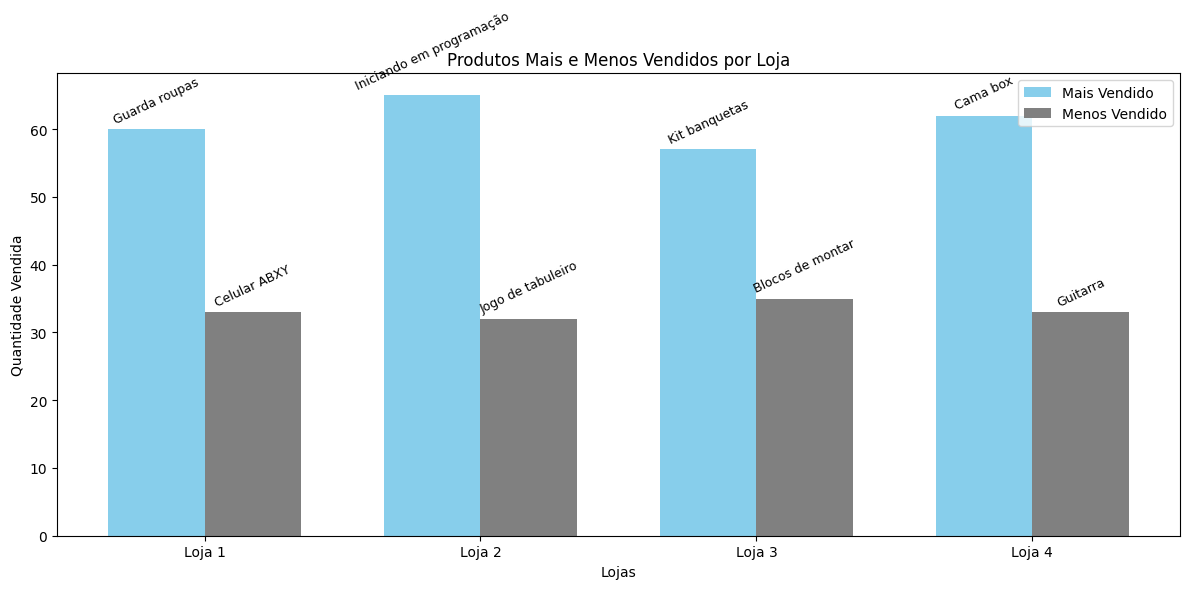

In [12]:
#dados do gráfico
lojas = resultado_produtos['Loja']
mais = resultado_produtos['Quantidade Vendida_Mais_Vendido']
menos = resultado_produtos['Quantidade Vendida_Menos_Vendido']
produtos_mais = resultado_produtos['Produto_Mais_Vendido']
produtos_menos = resultado_produtos['Produto_Menos_Vendido']

x = np.arange(len(lojas))  # posições das lojas
largura = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(12,6))

# Barras para produtos mais vendidos
barras_mais = ax.bar(x - largura/2, mais, largura, label='Mais Vendido', color='skyblue')

# Barras para produtos menos vendidos
barras_menos = ax.bar(x + largura/2, menos, largura, label='Menos Vendido', color='gray')

# Adicionando nomes dos produtos nas barras
for barra, produto in zip(barras_mais, produtos_mais):
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.5, produto, 
            ha='center', va='bottom', fontsize=9, rotation=25)

for barra, produto in zip(barras_menos, produtos_menos):
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.5, produto, 
            ha='center', va='bottom', fontsize=9, rotation=25)

# Labels e título
ax.set_ylabel('Quantidade Vendida')
ax.set_xlabel('Lojas')
ax.set_title('Produtos Mais e Menos Vendidos por Loja')
ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.legend()

plt.tight_layout()
plt.show()

**5. Frete Médio por Loja**
-
Neste passo, vamos calcular o custo médio de frete para cada loja. O objetivo é entender quanto, em média, está sendo gasto com frete para cada uma das lojas.

In [19]:
#calcular frete médio por loja
frete_medio = todas_lojas.groupby('Loja')['Frete'].mean().reset_index()
frete_medio.rename(columns={'Frete': 'Frete Médio'}, inplace=True)
frete_medio

,Loja,Frete Médio
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


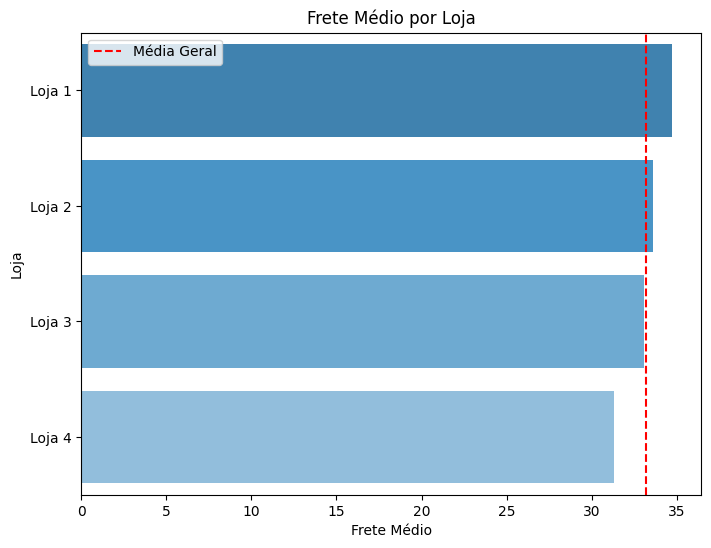

In [22]:
#frete médio geral (linha vertical)
media_frete = frete_medio['Frete Médio'].mean()

#gráfico ajustado
plt.figure(figsize=(8,6))
sns.barplot(data=frete_medio, x='Frete Médio', y='Loja', hue='Loja', palette=['#2E86C1', '#3498DB','#5DADE2', '#85C1E9'], dodge=False)
plt.axvline(media_frete, color='red', linestyle='--', label='Média Geral')

plt.xlabel('Frete Médio')
plt.ylabel('Loja')
plt.title('Frete Médio por Loja')
plt.legend()
plt.show()

**Análise e Recomendação de Loja para Venda**
--

Após a análise dos dados das quatro lojas da rede Alura Store, foram observados os seguintes pontos:

**Faturamento Total**: A Loja 4 apresentou o menor faturamento entre as quatro unidades, indicando menor volume de vendas e potencial de receita reduzido.

**Avaliações dos Clientes**: As avaliações médias da Loja 4 são inferiores em comparação às demais, apontando uma experiência de compra menos satisfatória para os clientes.

Conclusão:

Com base nesses indicadores, a Loja 4 é a unidade que apresenta menor eficiência operacional e comercial dentro da rede. Recomenda-se considerar esta loja como opção para venda, permitindo concentrar recursos e esforços nas lojas mais lucrativas e com melhor desempenho junto aos clientes.